In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob

import math
from scipy import linalg
from numpy.linalg import inv
from sklearn import linear_model, datasets
from function import *

To capture images from webcam

In [2]:
# cam = cv2.VideoCapture(0)
# cv2.namedWindow("test")

# while True:
#     ret, frame = cam.read()
#     cv2.imshow("test", frame)
    
#     if not ret:
#         break
#     k = cv2.waitKey(1)

#     if k%256 == 27:
#         # ESC pressed
#         print("Escape hit, closing...")
#         break
#     elif k%256 == 32:
#         # SPACE pressed
# #         img_name = "opencv_frame_{}.png".format(img_counter)
#         img_name = "a2.png"
#         cv2.imwrite(img_name, frame)
#         print("{} written!".format(img_name))
# #         img_counter += 1

# cam.release()

# cv2.destroyAllWindows()

Taking the image from the opencv webstite, as the object-3d-coordinates are mentioned for those pics

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((21*15,3), np.float32)
objp[:,:2] = np.mgrid[0:21,0:15].T.reshape(-1,2)

In [4]:
# objp

In [5]:
objp.shape

(315, 3)

In [6]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('a2.png')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (21,15),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        
        # termination criteria
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        
        objpoints.append(objp)
        cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (21,15), corners,ret)
        cv2.imshow('img',img)
        cv2.imshow('gray',gray)
        cv2.waitKey(5000000)
    
cv2.destroyAllWindows()

In [7]:
corners = corners.reshape((315,2))
corners.shape

(315, 2)

In [8]:
x_mean = np.mean(corners[:,0])
y_mean = np.mean(corners[:,1])
print("x_mean",x_mean)
print("y_mean",y_mean)

x_mean 284.7888
y_mean 206.42894


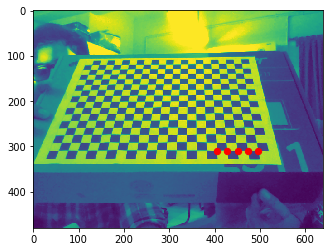

In [9]:
img = cv2.imread("a2.png", cv2.IMREAD_GRAYSCALE)
implot = plt.imshow(img)

plt.scatter(x=corners[:5,0], y=corners[:5,1], c='r', s=40)

plt.show()

In [10]:
# corners

In [11]:
# Need some co-ordinates
img_p, corners_ = return_imagepoints()
obj_p = return_objpoints()
obj_p4 = homo_obj4(obj_p)
obj_p3 = homo_obj3(obj_p)
img_p = homo_img(img_p)
obj_pt3 = obj_p3.T
obj_pt4 = obj_p4.T
img_pt = img_p.T

# This is for opencv k-matrix
objpoints = [] 
imgpoints = []
imgpoints.append(corners_)
objpoints.append(obj_p)
img = cv2.imread("./a2.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
rx = [[1,0,0],[0,math.cos(rvecs[0][0]),math.sin(rvecs[0][0])],[0,(-1)*math.sin(rvecs[0][0]),math.cos(rvecs[0][0])]]
ry = [[math.cos(rvecs[0][1]),0,math.sin(rvecs[0][1])],[0,1,0],[(-1)*math.sin(rvecs[0][1]),0,math.cos(rvecs[0][1])]]
rz = [[math.cos(rvecs[0][2]),math.sin(rvecs[0][2]),0],[(-1)*math.sin(rvecs[0][2]),math.cos(rvecs[0][2]),0],[0,0,1]]
R1 = np.matmul(rx,ry)
R = np.matmul(R1,rz)
m = np.ones((3,4))
m[:,:3] = R
m[:,[3]]= np.array(tvecs)
cv_homography = np.matmul(mtx,m)
pcv = cv_homography/cv_homography[-1,-1]

# This is for our k-matrix
_p = projection_matrix4(img_pt,obj_pt4)

In [12]:
x_mean = np.mean(corners[:,0])
y_mean = np.mean(corners[:,1])
print("x_mean",x_mean)
print("y_mean",y_mean)

x_mean 284.7888
y_mean 206.42894


In [13]:
mean_ox = obj_p[:,0].mean()
mean_oy = obj_p[:,1].mean()
print(mean_ox,"\t", mean_oy)

10.0 	 7.0


In [14]:
proj_cv = img_projection(_p, np.array([[0,0,1],[0,0,0],[1,0,0],[0,1,0]]))

proj_cv

array([[ 495.82252202,  495.6722123 ,  -87.70619385,  859.17519144],
       [ 891.21239673,  307.76480368,  316.7509517 , -148.60745698],
       [   1.        ,    1.        ,    1.02853531,    2.02970664]])

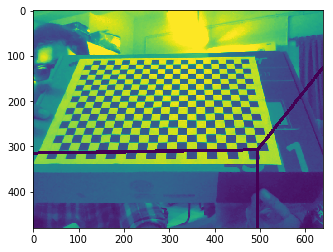

In [15]:
img = cv2.imread("a2.png", cv2.IMREAD_GRAYSCALE)

# plt.imshow(img)
# plt.scatter(x=proj_cv[0,1], y=proj_cv[1,1], c='r', s=40)

cv2.line(img,(int(proj_cv[0,0]),int(proj_cv[1,0])),(int(proj_cv[0,1]),int(proj_cv[1,1])),(0,255,0),5)
cv2.line(img,(int(proj_cv[0,2]),int(proj_cv[1,2])),(int(proj_cv[0,1]),int(proj_cv[1,1])),(0,255,0),5)
cv2.line(img,(int(proj_cv[0,3]),int(proj_cv[1,3])),(int(proj_cv[0,1]),int(proj_cv[1,1])),(0,255,0),5)
plt.imshow(img)


plt.show()

In [22]:
img_p[:,:5]
obj_p3.shape

a = img_projection(_p,obj_p3.T)
b = a[:,:]/a[2,:]
b[:,:5]

array([[ 4.95822522e+02, -8.51267655e+01, -6.34710944e+02,
        -1.15540332e+03, -1.64942383e+03],
       [ 8.91212397e+02,  8.75223764e+02,  8.60098348e+02,
         8.45768080e+02,  8.32171863e+02],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00]])

In [21]:
img_p[:,:5]

array([[496.90975952, 474.15545654, 451.12341309, 428.28366089,
        405.47537231],
       [310.34054565, 309.70172119, 309.73733521, 309.17352295,
        309.41809082],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ]])

-------------------------------

## **Undistortion**

In [23]:
img = cv2.imread('chess1.jpg')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

We have got what we were trying. Now we can take an image and undistort it.

In [24]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

False

USE REMAPPING

In [26]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
 
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

REPROJECTION ERROR

In [ ]:
mean_error = 0
for i in xrange(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print "total error: ", mean_error/len(objpoints)